In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load the data

In [5]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [6]:
# Check for missing data

In [7]:
missing_data = data.isnull().sum()
print("Columns with missing data:")
print(missing_data[missing_data > 0])


Columns with missing data:
bmi    201
dtype: int64


In [11]:
# Handle missing values for numerical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handle missing values for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [12]:
# Confirm that there are no more missing values
print("Columns with missing data after filling:")
print(data.isnull().sum())


Columns with missing data after filling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [13]:
# Replace 'stroke' with the actual target variable column name
target_column_name = 'stroke'

In [14]:
# Check if the specified column name is in the dataset
if target_column_name not in data.columns:
    raise KeyError(f"'{target_column_name}' not found in the dataset. Choose a valid target variable column name.")


In [15]:
#split the data 
X = data.drop(target_column_name, axis=1)
y = data[target_column_name]

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Assuming 'degree' is the degree of the polynomial you want to use
degree = 3

# Identify numeric columns in the dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer to handle numeric features and polynomial transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False), numeric_features)
    ])

# Create a pipeline for K-Nearest Neighbors (KNN) classifier
knn_classifier = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Standardize features
    ('knn_classifier', KNeighborsClassifier(n_neighbors=5))  # Adjust 'n_neighbors' as needed
])

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)



In [30]:
# Evaluate the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:")
print(classification_report_knn)



KNN Accuracy: 0.9354207436399217
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



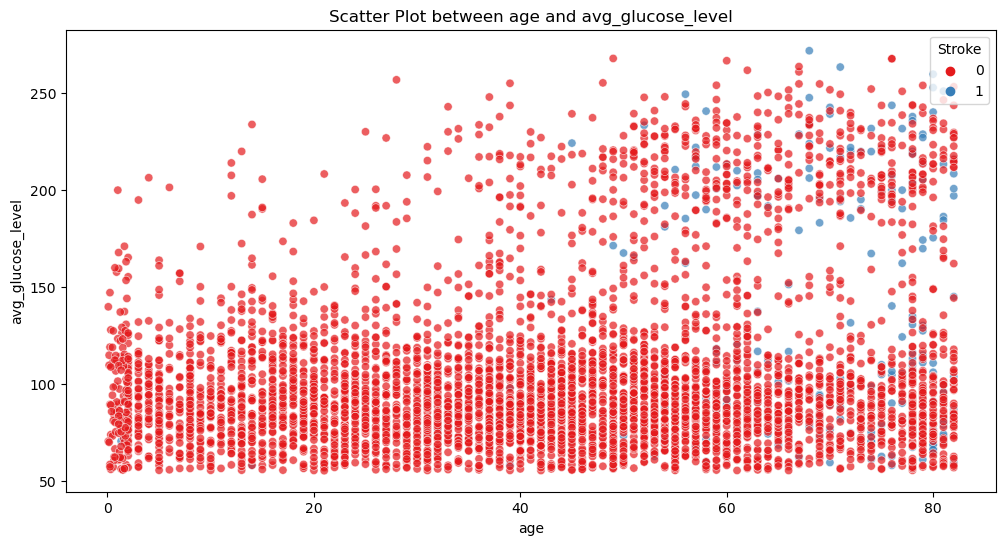

In [31]:
# Visualizations
feature1 = 'age'
feature2 = 'avg_glucose_level'

# Scatter plot with color-coded classes
plt.figure(figsize=(12, 6))
sns.scatterplot(x=feature1, y=feature2, data=data, hue='stroke', palette='Set1', alpha=0.7)
plt.title(f'Scatter Plot between {feature1} and {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Stroke', loc='upper right')
plt.show()

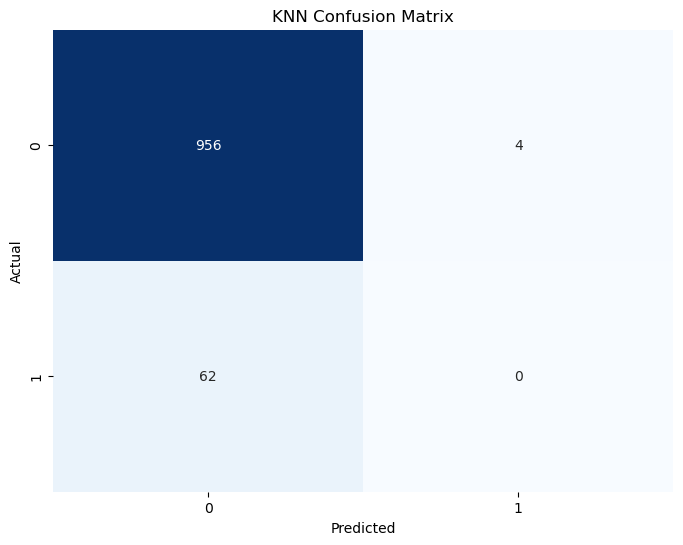

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()